In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from src.utils.pre_process import calculate_distance_list,\
                                  get_coord,\
                                  apply_map,\
                                  get_coordinates_from_cep,\
                                  find_similar_dist

the data columns are:Index(['idMember', 'firstName', 'lastName', 'registerDate', 'idBranch',
       'branchName', 'accessBlocked', 'blockedReason', 'document',
       'documentId', 'maritalStatus', 'gender', 'birthDate', 'address',
       'state', 'city', 'zipCode', 'complement', 'neighborhood',
       'accessCardNumber', 'number', 'membershipStatus', 'penalized', 'status',
       'contacts', 'memberships', 'lastAccessDate', 'idEmployeeConsultant',
       'nameEmployeeConsultant', 'idEmployeeInstructor',
       'nameEmployeeInstructor', 'idEmployeePersonalTrainer',
       'nameEmployeePersonalTrainer', 'photoUrl', 'country',
       'idMemberMigration', 'responsibles', 'gympassId', 'personalTrainer',
       'personalType', 'cref', 'crefExpirationDate', 'name', 'idMembership',
       'idMemberMemberShip', 'numMembers', 'idSale', 'nameMembership',
       'membershipStart', 'membershipEnd', 'registerCancelDate', 'cancelDate',
       'saleDate', 'cancellationFine', 'remainingValue', 'receiv

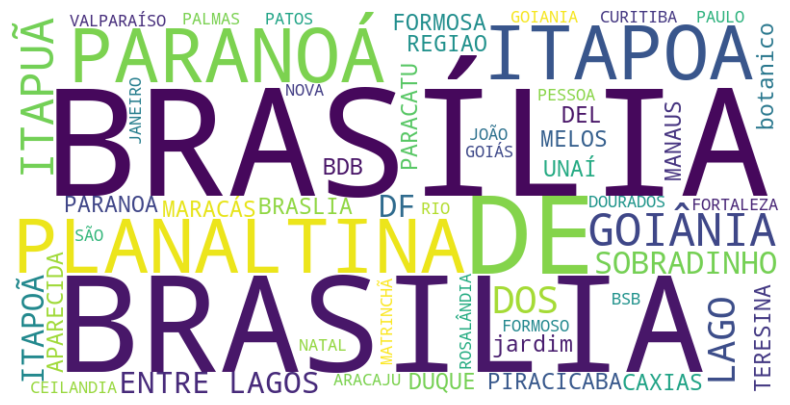

In [15]:



df = pd.read_csv('C:\\Users\\Pichau\\PycharmProjects\\worldgym\\data\\data_raw.csv', index_col=0)

%run utils/pre_process.py

data = df.copy()
print(f"the data columns are:{data.columns}")
data = data[[
           'address',
           'state',
           'city',
           'zipCode',
           'membershipStatus',
           'unidade',
           'registerDate',
            ]]

data = data.dropna(subset=['address', 'zipCode', 'city', 'registerDate'])


# Join the unique city names into a single string
text = ' '.join(data['city'].unique())

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', width=800, height=400, collocation_threshold=11)

# Generate a word cloud
wordcloud.generate(text)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

map_name = {
    'BRASÍLIA': 'Brasilia',
    'BRASILIA': 'Brasilia',
    "'BRASILIA": 'Brasilia',
    ' BRASILIA': 'Brasilia',
    'Brasilia ': 'Brasilia',
    'BARSILIA': 'Brasilia',
    'BRASILI': 'Brasilia',
    'BRASÍLIA-DF': 'Brasilia',
    'BSB': 'Brasilia',
    'Brasilia': 'Brasilia',
    'PARANOA': 'Paranoa',
    'PARANOÁ': 'Paranoa',
    'PARANOÁ ': 'Paranoa',
    'PLANALTINA': 'Planaltina',
    'PLANALTINA ': 'Planaltina',
    'SOBRADINHO DOS MELOS': 'Sobradinho',
    'GOIÂNIA': 'Goiania',
    'Goiânia': 'Goiania',
    'APARECIDA DE GOIÂNIA': 'Goiania',
    'Itapuã ': 'Itapoa',
    'ITAPOA': 'Itapoa',
    'ITAPUÃ': 'Itapoa',
    'ITAPOÃ': 'Itapoa',
    'ITAPOÃ ': 'Itapoa',
    'ITAPOA-DF ': 'Itapoa',
    'ITAPOA ': 'Itapoa',
    'FAZENDINHA (ITAPOÃ)': 'Itapoa',
    'SOBRADINHO' : 'Sobradinho',
    'RIO DE JANEIRO': 'Rio_de_Janeiro',
    'SÃO PAULO': 'São_Paulo',
    'CURITIBA': 'Curitiba',
    'MANAUS': 'Manaus',
    'FORTALEZA': 'Fortaleza',
    'NATAL': 'Natal',
    'DEL LAGO' : 'Regiao_dos_Lagos',
    'REGIAO DOS LAGOS': 'Regiao_dos_Lagos',
    # Add more name variations here...
}

gym_cordinates = {
    'Itapoã, DF': (-15.751971192888982, -47.76314034147339),
}


In [16]:
df.columns

Index(['idMember', 'firstName', 'lastName', 'registerDate', 'idBranch',
       'branchName', 'accessBlocked', 'blockedReason', 'document',
       'documentId', 'maritalStatus', 'gender', 'birthDate', 'address',
       'state', 'city', 'zipCode', 'complement', 'neighborhood',
       'accessCardNumber', 'number', 'membershipStatus', 'penalized', 'status',
       'contacts', 'memberships', 'lastAccessDate', 'idEmployeeConsultant',
       'nameEmployeeConsultant', 'idEmployeeInstructor',
       'nameEmployeeInstructor', 'idEmployeePersonalTrainer',
       'nameEmployeePersonalTrainer', 'photoUrl', 'country',
       'idMemberMigration', 'responsibles', 'gympassId', 'personalTrainer',
       'personalType', 'cref', 'crefExpirationDate', 'name', 'idMembership',
       'idMemberMemberShip', 'numMembers', 'idSale', 'nameMembership',
       'membershipStart', 'membershipEnd', 'registerCancelDate', 'cancelDate',
       'saleDate', 'cancellationFine', 'remainingValue', 'receivables',
       'minPe

['Planaltina' 'Brasilia' 'Paranoa' 'Regiao_dos_Lagos' 'Sobradinho'
 'Itapoa' 'Goiania' 'PIRACICABA' 'BRASLIA ' 'FORMOSA' 'DUQUE DE CAXIAS'
 'TERESINA' 'BRASILIA ' 'UNAÍ' 'BRASÍLIA ' 'JARDIM BOTANICO' 'BDB'
 'MARACÁS' 'PARACATU' 'Manaus' 'VALPARAÍSO DE GOIÁS' 'CEILANDIA'
 'ENTRE LAGOS' 'PALMAS' 'ARACAJU' 'MATRINCHÃ' 'São_Paulo' 'PATOS'
 'DOURADOS' 'Curitiba' 'Rio_de_Janeiro' 'Natal' 'Fortaleza' 'FORMOSO'
 'JOÃO PESSOA' 'ITAPUÃ ' 'NOVA ROSALÂNDIA' 'ENTRE LAGOS ' 'GOIANIA ']


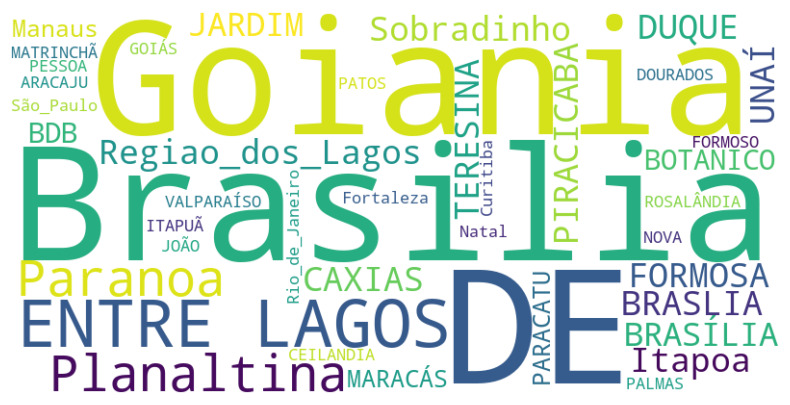

In [17]:
data = apply_map(data, 'city', map_name = map_name)
data['address'] = data['address'].fillna('')
data['city'] = data['city'].fillna('')
data['coordinates'] = (data['address'] + ', ' + data['city']).apply(get_coord)
data['gym_coordinates'] = data['unidade'].map(gym_cordinates)

print(data['city'].unique())

# Join the unique city names into a single string
text = ' '.join(data['city'].unique())

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', width=800, height=400, collocation_threshold=10)

# Generate a word cloud
wordcloud.generate(text)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
data['dist'] = calculate_distance_list(data['coordinates'], data['gym_coordinates'])

In [19]:
data["shortzip"] = data["zipCode"].astype(str).str.slice(start=0, stop=5)
mask = data['dist'] > 150
data.loc[mask, 'coordinates'] = data.loc[mask, 'shortzip'].apply(get_coordinates_from_cep)

In [20]:
data['dist'] = calculate_distance_list(data['coordinates'], data['gym_coordinates'])

In [21]:
display(data[['coordinates', 'gym_coordinates', 'dist']])

,coordinates,gym_coordinates,dist
0,"(-15.6112738, -47.6327429)","(-15.751971192888982, -47.76314034147339)",20.923697
2,"(47.38517766666667, 35.6995)","(-15.751971192888982, -47.76314034147339)",10801.144555
5,"(59.0132317, 15.5805282)","(-15.751971192888982, -47.76314034147339)",10057.049921
6,"(59.0132317, 15.5805282)","(-15.751971192888982, -47.76314034147339)",10057.049921
8,"(53.4609797, 14.5563003)","(-15.751971192888982, -47.76314034147339)",9684.871305
...,...,...,...
7501,"(-15.6147943, -47.6457457)","(-15.751971192888982, -47.76314034147339)",19.717808
7502,"(-15.741605, -47.7691711)","(-15.751971192888982, -47.76314034147339)",1.316628
7503,"(-12.12760145, -44.95254595)","(-15.751971192888982, -47.76314034147339)",502.997173
7504,"(-15.672833350000001, -48.199283706655606)","(-15.751971192888982, -47.76314034147339)",47.561640


In [ ]:
print(data['dist'].describe())

In [ ]:
analyse = data['dist'][data['dist'] < 250]
data['dist'].hist(bins= 100)

In [ ]:
display(data[['address', 'city', 'shortzip', 'zipCode', 'coordinates', 'dist']])

In [ ]:
mask = data['dist'] > 150
data.loc[mask, 'dist'] = data.loc[mask, 'zipCode'].apply(lambda zipCode: find_similar_dist(zipCode, data))


In [ ]:
display(data[['address', 'city', 'zipCode', 'coordinates', 'dist']])

In [ ]:
mask = data['dist'] < 250
data['dist'].hist(bins = 50)

In [11]:
import folium

# Create a Map centered around Brazil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Get the coordinates of the first location and the gym
I=10
location_coordinates = data.iloc[I]['coordinates']
gym_coordinates = data.iloc[I]['gym_coordinates']

# Add a marker for the first location
folium.Marker(
    location=[location_coordinates[0], location_coordinates[1]],
    icon=folium.Icon(color='blue'),  # Color the marker blue
    popup=f"Location: {data.iloc[0]['address']} in {data.iloc[0]['city']}"
).add_to(m)

# Add a marker for the gym
folium.Marker(
    location=[gym_coordinates[0], gym_coordinates[1]],
    icon=folium.Icon(color='red'),  # Color the marker red
    popup="Gym Location"
).add_to(m)

# Display the map
m


KeyError: 'coordinates'

In [ ]:
data.columns

In [ ]:
display(data[['address', 'city', 'zipCode', 'coordinates', 'dist']][data['zipCode'].str.startswith('71596')])


In [ ]:
display(data['membershipStatus'][data['membershipStatus'] == 'Active'])

In [ ]:
data_raw.csv

In [10]:
import pandas as pd
data = pd.read_csv('data/data_raw.csv')

,Unnamed: 0,idMember,firstName,lastName,registerDate,idBranch,branchName,accessBlocked,blockedReason,document,...,membershipStart,membershipEnd,registerCancelDate,cancelDate,saleDate,cancellationFine,remainingValue,receivables,minPeriodStayMembership,unidade
0,0,13751,LUCIANA DOS REIS CAMARA FROES,NaN,2011-10-31T13:33:40,7,WORLD GYM ITAPOÃ,False,NaN,01204442169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"
1,1,39767,LARISSA,AGUIAR,2020-12-16T14:21:35,7,WORLD GYM ITAPOÃ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"
2,2,39979,SIMONE RIBEIRO,LOPES DE ALMEIDA,2021-02-09T08:46:54,7,WORLD GYM ITAPOÃ,NaN,NaN,00415140170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"
3,3,39980,JORGE,DE JESUS,2021-02-09T09:07:44,7,WORLD GYM ITAPOÃ,NaN,NaN,46278460106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"
4,4,39981,LEILA,ALVES DE SOUZA,2021-02-09T09:13:19,7,WORLD GYM ITAPOÃ,NaN,NaN,00892907126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7501,7501,78397,YCARO GONÇALVES,NOBREGA,2023-08-14T19:26:56,7,WORLD GYM ITAPOÃ,NaN,NaN,04123510132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"
7502,7502,78406,REINALDO,MARQUES DA SILVA,2023-08-14T20:08:05,7,WORLD GYM ITAPOÃ,True,falta trazer o termo de autorizaçao do cartao,00043748198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"
7503,7503,78412,OTTO,BITENCOURT CUNHA,2023-08-14T21:05:10,7,WORLD GYM ITAPOÃ,NaN,NaN,13260087737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"
7504,7504,78429,EDILANE RITA,LIMA DE SOUZA,2023-08-15T10:43:52,7,WORLD GYM ITAPOÃ,NaN,NaN,08595528101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Itapoã, DF"


In [ ]:
print(data.columns)
print(data['dist'].describe())
# data.cancellationFine.hist()

plt.show()

# 'cancellationFine'

plots.cum_hist(data, 'dist', hist_bins=30, hist_density=False)

print(data['dist'].isna().sum())
print(data['registerDate'][~data['registerDate'].isna()]) #ml - transform into days since register
print(data['nameEmployeeConsultant'][~data['nameEmployeeConsultant'].isna()])
print(data['nameEmployeeInstructor'][~data['nameEmployeeInstructor'].isna()].value_counts()) #ml - transform into binary

print(data['lastAccessDate'][~data['lastAccessDate'].isna()]) #ml - transform into days since last access
print(data['maritalStatus'][~data['maritalStatus'].isna()]) #ml - transform into binary
'birthDate'
print(data['birthDate'][~data['birthDate'].isna()]) #ml - transform into age


print(data['accessBlocked'][~data['accessBlocked'].isna()].value_counts())
print(data['gender'][~data['gender'].isna()].value_counts())

'lastAccessDate'
print(data['lastAccessDate'][~data['lastAccessDate'].isna()])

dataset = data[['idMember', 'dist', 'registerDate', 'nameEmployeeConsultant',
                'nameEmployeeInstructor', 'lastAccessDate', 'maritalStatus',
                'birthDate', 'accessBlocked', 'gender',
                'date_since_last_access']]

In [1]:
import requests
import pandas as pd
import json
import os

class GetClientData:
    def __init__(self, endpoint="/api/v1/members", take_number=25, unidade = 'planaltina'):
        self.base_url = "https://evo-integracao.w12app.com.br/"
        self.user = "worldgym"
        if unidade == "itapoa":
            self.password = "44D6E01E-6DFF-4E0F-A787-73F0036496F1"
        elif unidade == "planaltina":
            self.password = "D1BC64B6-4EE7-4E16-974E-BD37F2F3DC2E"

        self.endpoint = endpoint
        self.params = {
            "take": take_number,
            "skip": 0,
            "onlyPersonal": False,
            "showActivityData": True
        }
        self.data = []

    def make_api_request(self):
        try:
            while True:
                response = requests.get(self.base_url + self.endpoint, auth=(self.user, self.password), params=self.params)
                response.raise_for_status()

                # Debugging Point: Print the status code
                print(f"Status Code: {response.status_code}")

                current_data = response.json()
                self.data.extend(current_data)

                # Debugging Point: Print the number of records fetched so far
                print(f"Total Records So Far: {len(self.data)}")

                if len(current_data) < self.params["take"]:
                    break
                self.params["skip"] += self.params["take"]
                print(f"Retrieved {self.params['skip']} records so far")

        except requests.exceptions.RequestException as e:
            print("Error:", e)

    def retrieve_data(self, use_cache=True):
        cache_file_path = f"C:/Users/Pichau/PycharmProjects/worldgym/data/{self.endpoint.replace('/','_')}_cache.json"

        if use_cache and os.path.exists(cache_file_path):
            with open(cache_file_path, "r") as file:
                self.data = json.load(file)
            print(f"Data loaded from cache for endpoint: {self.endpoint}")
        else:
            self.make_api_request()
            print(f"Total records retrieved: {len(self.data)}")
            os.makedirs(os.path.dirname(cache_file_path), exist_ok=True)
            with open(cache_file_path, "w") as file:
                json.dump(self.data, file)
            print("Data cached.")

        df = pd.DataFrame(self.data)
        return df


clients_planaltina = GetClientData(endpoint = "/api/v1/members", take_number=50)
df = clients_planaltina.retrieve_data(use_cache=False)

Status Code: 200
Total Records So Far: 50
Retrieved 50 records so far
Status Code: 200
Total Records So Far: 100
Retrieved 100 records so far
Status Code: 200
Total Records So Far: 150
Retrieved 150 records so far
Status Code: 200
Total Records So Far: 200
Retrieved 200 records so far
Status Code: 200
Total Records So Far: 250
Retrieved 250 records so far
Status Code: 200
Total Records So Far: 300
Retrieved 300 records so far
Status Code: 200
Total Records So Far: 350
Retrieved 350 records so far
Status Code: 200
Total Records So Far: 400
Retrieved 400 records so far
Status Code: 200
Total Records So Far: 450
Retrieved 450 records so far
Status Code: 200
Total Records So Far: 500
Retrieved 500 records so far
Status Code: 200
Total Records So Far: 550
Retrieved 550 records so far
Status Code: 200
Total Records So Far: 600
Retrieved 600 records so far
Error: ('Connection broken: IncompleteRead(7933 bytes read, 1090479 more expected)', IncompleteRead(7933 bytes read, 1090479 more expected